<a href="https://colab.research.google.com/github/samitha278/Pattern-Recognition/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, HuberRegressor, RANSACRegressor
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

In [ ]:
np.random.seed(42)

# Main cluster of data points (horizontal trend around y=0)
n_main = 50
x_main = np.random.uniform(0, 10, n_main)
y_main = np.random.normal(0, 15, n_main)  # Horizontal trend with noise

# Add outliers
outliers_x = np.array([1, 9, 10, 10.5])
outliers_y = np.array([-150, 150, 180, 200])

# Combine all data
x_all = np.concatenate([x_main, outliers_x])
y_all = np.concatenate([y_main, outliers_y])

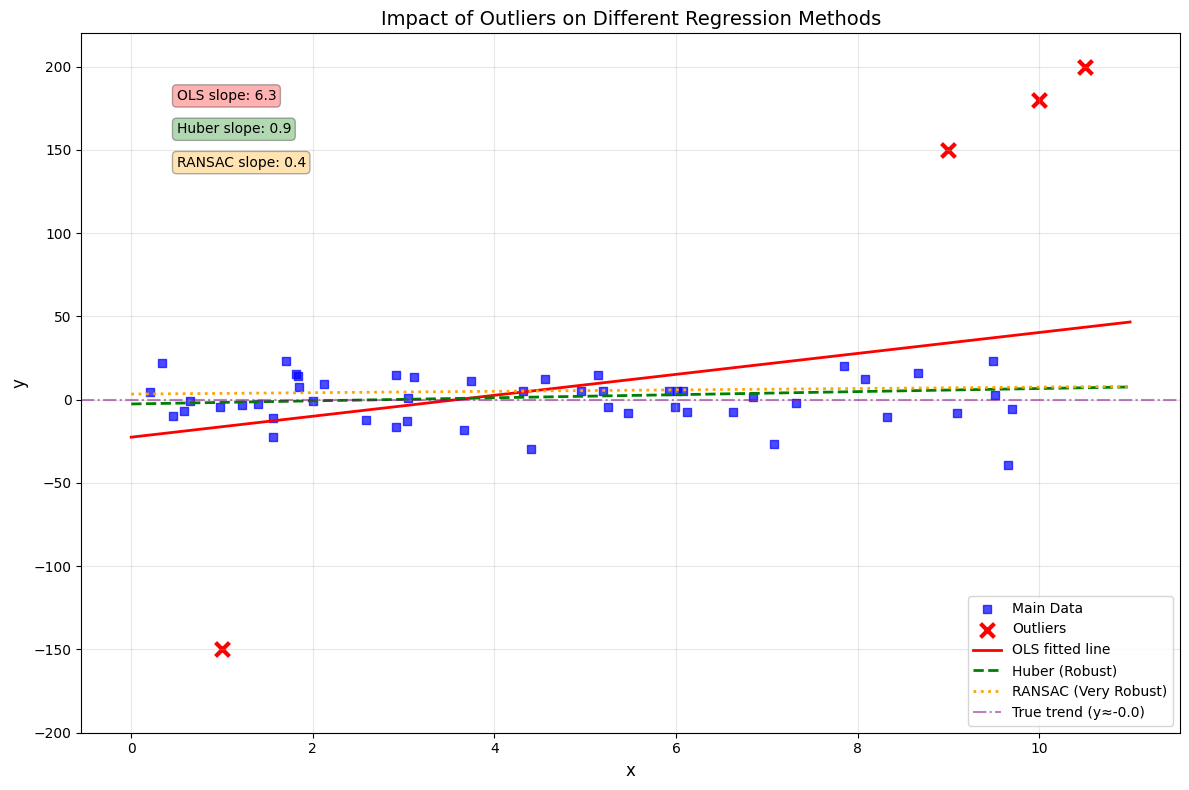

In [ ]:
# Identify outliers for plotting
is_outlier = np.concatenate([np.zeros(n_main, dtype=bool), np.ones(len(outliers_x), dtype=bool)])

# Reshape for sklearn
X = x_all.reshape(-1, 1)
y = y_all

# Fit different regression models
ols = LinearRegression()
huber = HuberRegressor(epsilon=1.35)  # Robust to outliers
ransac = RANSACRegressor(random_state=42)  # Very robust to outliers

ols.fit(X, y)
huber.fit(X, y)
ransac.fit(X, y)

# Generate points for plotting the fitted lines
x_plot = np.linspace(0, 11, 100).reshape(-1, 1)
y_ols = ols.predict(x_plot)
y_huber = huber.predict(x_plot)
y_ransac = ransac.predict(x_plot)

# Create the plot
plt.figure(figsize=(12, 8))

# Plot main data points
plt.scatter(x_all[~is_outlier], y_all[~is_outlier],
           color='blue', marker='s', s=40, label='Main Data', alpha=0.7)

# Plot outliers
plt.scatter(x_all[is_outlier], y_all[is_outlier],
           color='red', marker='x', s=100, label='Outliers', linewidth=3)

# Plot fitted lines
plt.plot(x_plot, y_ols, 'r-', linewidth=2, label='OLS fitted line')
plt.plot(x_plot, y_huber, 'g--', linewidth=2, label='Huber (Robust)')
plt.plot(x_plot, y_ransac, 'orange', linestyle=':', linewidth=2, label='RANSAC (Very Robust)')

# Add a reference line through the main data cluster
main_mean_y = np.mean(y_main)
plt.axhline(y=main_mean_y, color='purple', linestyle='-.', alpha=0.5,
           label=f'True trend (y≈{main_mean_y:.1f})')

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Impact of Outliers on Different Regression Methods', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(-200, 220)

# Add text annotations
plt.text(0.5, 180, f'OLS slope: {ols.coef_[0]:.1f}', fontsize=10,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="red", alpha=0.3))
plt.text(0.5, 160, f'Huber slope: {huber.coef_[0]:.1f}', fontsize=10,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="green", alpha=0.3))
plt.text(0.5, 140, f'RANSAC slope: {ransac.estimator_.coef_[0]:.1f}', fontsize=10,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="orange", alpha=0.3))

plt.tight_layout()
plt.show()

In [ ]:
print("=== Regression Results ===")
print(f"OLS Regression:")
print(f"  Slope: {ols.coef_[0]:.3f}")
print(f"  Intercept: {ols.intercept_:.3f}")
print(f"  R²: {ols.score(X, y):.3f}")

print(f"\nHuber Regression (Robust):")
print(f"  Slope: {huber.coef_[0]:.3f}")
print(f"  Intercept: {huber.intercept_:.3f}")
print(f"  R²: {huber.score(X, y):.3f}")

print(f"\nRANSAC Regression (Very Robust):")
print(f"  Slope: {ransac.estimator_.coef_[0]:.3f}")
print(f"  Intercept: {ransac.estimator_.intercept_:.3f}")
print(f"  R²: {ransac.score(X, y):.3f}")
print(f"  Inliers identified: {np.sum(ransac.inlier_mask_)}/{len(y)} points")

# Demonstrate the mathematical reason
print("\n=== Why OLS is Affected by Outliers ===")
print("OLS Loss Function: L = (1/N) * Σ(yi - ŷi)²")
print("\nSquared residuals for outliers:")
ols_predictions = ols.predict(X)
for i, is_out in enumerate(is_outlier):
    if is_out:
        residual = y[i] - ols_predictions[i]
        squared_residual = residual**2
        print(f"Point ({x_all[i]:.1f}, {y_all[i]:.0f}): residual² = {squared_residual:.0f}")

print(f"\nTotal squared error (OLS): {np.sum((y - ols_predictions)**2):.0f}")
print("The large squared residuals from outliers dominate the loss function,")
print("forcing the line to 'compromise' and move away from the main data cluster.")

# Show what happens without outliers
print("\n=== Regression WITHOUT Outliers ===")
X_clean = X[~is_outlier]
y_clean = y[~is_outlier]

ols_clean = LinearRegression()
ols_clean.fit(X_clean, y_clean)

print(f"OLS on clean data:")
print(f"  Slope: {ols_clean.coef_[0]:.3f}")
print(f"  Intercept: {ols_clean.intercept_:.3f}")
print(f"  R²: {ols_clean.score(X_clean, y_clean):.3f}")
print("\nNotice how the slope is much closer to 0 (horizontal) without outliers!")

=== Regression Results ===
OLS Regression:
  Slope: 6.288
  Intercept: -22.516
  R²: 0.161

Huber Regression (Robust):
  Slope: 0.928
  Intercept: -2.571
  R²: 0.032

RANSAC Regression (Very Robust):
  Slope: 0.420
  Intercept: 3.358
  R²: 0.020
  Inliers identified: 28/54 points

=== Why OLS is Affected by Outliers ===
OLS Loss Function: L = (1/N) * Σ(yi - ŷi)²

Squared residuals for outliers:
Point (1.0, -150): residual² = 17895
Point (9.0, 150): residual² = 13439
Point (10.0, 180): residual² = 19499
Point (10.5, 200): residual² = 24491

Total squared error (OLS): 104069
The large squared residuals from outliers dominate the loss function,
forcing the line to 'compromise' and move away from the main data cluster.

=== Regression WITHOUT Outliers ===
OLS on clean data:
  Slope: -0.335
  Intercept: 1.450
  R²: 0.005

Notice how the slope is much closer to 0 (horizontal) without outliers!


In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the penguins dataset
df = sns.load_dataset("penguins")
df.dropna(inplace=True)

# Filter rows for 'Adelie' and 'Chinstrap' classes (removed extra spaces)
selected_classes = ['Adelie', 'Chinstrap']
df_filtered = df[df['species'].isin(selected_classes)].copy()

# Initialize the LabelEncoder
le = LabelEncoder()

# Encode the species column
y_encoded = le.fit_transform(df_filtered['species'])
df_filtered['class_encoded'] = y_encoded

# Display the filtered and encoded DataFrame
print(df_filtered[['species', 'class_encoded']])

# Split the data into features (X) and target variable (y)
y = df_filtered['class_encoded']  # Target variable

# Drop non-numeric columns and target column for features
X = df_filtered.select_dtypes(include=['number']).drop(['class_encoded'], axis=1)

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Feature columns: {X.columns.tolist()}")

       species  class_encoded
0       Adelie              0
1       Adelie              0
2       Adelie              0
4       Adelie              0
5       Adelie              0
..         ...            ...
215  Chinstrap              1
216  Chinstrap              1
217  Chinstrap              1
218  Chinstrap              1
219  Chinstrap              1

[214 rows x 2 columns]

Features shape: (214, 4)
Target shape: (214,)
Feature columns: ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model. Here we are using saga solver to learn weights.
logreg = LogisticRegression(solver='saga', max_iter=1000)
logreg.fit(X_train, y_train)

# Predict on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Coefficients:", logreg.coef_)
print("Intercept:", logreg.intercept_)

Accuracy: 0.5813953488372093
Coefficients: [[ 0.02592186 -0.00107239  0.00115963 -0.00057901]]
Intercept: [-0.00010193]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

np.random.seed(0)
centers = [[-5, 0], [5, 1.5]]

X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)

print("Data generated successfully")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

Data generated successfully
X shape: (2000, 2)
y shape: (2000,)


In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X[y==0, 0], X[y==0, 1], c='red', marker='o', alpha=0.7, label='Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], c='blue', marker='s', alpha=0.7, label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Generated Dataset')
plt.grid(True, alpha=0.3)
plt.show()